In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Assuming your data is stored in a CSV file named 'mobility_data.csv'
data = pd.read_excel('transport.xlsx')


In [3]:
data.head(3)

,Country,Type of day,Urban or Short-distance mobility,Gender,Age band,Covid impact,Type,Sub type,Indicator,Lower bound,Estimator,Upper bound,Sample size
0,BE,working day,Urban mobility,NaN,NaN,NaN,mode,car as driver,Average number of trips per person per day,0.507657,0.562061,0.616466,3067.0
1,BE,working day,Urban mobility,NaN,NaN,NaN,mode,car as passenger,Average number of trips per person per day,0.085728,0.105459,0.125190,3067.0
2,BE,working day,Urban mobility,NaN,NaN,NaN,mode,taxi as passenger,Average number of trips per person per day,0.000000,0.002756,0.006202,3067.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51840 entries, 0 to 51839
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           51840 non-null  object 
 1   Type of day                       24192 non-null  object 
 2   Urban or Short-distance mobility  24192 non-null  object 
 3   Gender                            6912 non-null   object 
 4   Age band                          10368 non-null  object 
 5   Covid impact                      10368 non-null  object 
 6   Type                              51840 non-null  object 
 7   Sub type                          50220 non-null  object 
 8   Indicator                         51840 non-null  object 
 9   Lower bound                       44427 non-null  float64
 10  Estimator                         51840 non-null  float64
 11  Upper bound                       44427 non-null  float64
 12  Samp

In [5]:
# Check for missing values
data.isnull().sum()

Country                                 0
Type of day                         27648
Urban or Short-distance mobility    27648
Gender                              44928
Age band                            41472
Covid impact                        41472
Type                                    0
Sub type                             1620
Indicator                               0
Lower bound                          7413
Estimator                               0
Upper bound                          7413
Sample size                             0
dtype: int64

Since we have lots of missing values and do not want to influence the data by filling in, we have decided to replace the missing values with "unknown"

In [6]:
data = data.fillna('unknown')

In [7]:
data.isnull().sum()

Country                             0
Type of day                         0
Urban or Short-distance mobility    0
Gender                              0
Age band                            0
Covid impact                        0
Type                                0
Sub type                            0
Indicator                           0
Lower bound                         0
Estimator                           0
Upper bound                         0
Sample size                         0
dtype: int64

In [8]:
data = data.drop('Covid impact', axis=1)


In [9]:
data.head()

,Country,Type of day,Urban or Short-distance mobility,Gender,Age band,Type,Sub type,Indicator,Lower bound,Estimator,Upper bound,Sample size
0,BE,working day,Urban mobility,unknown,unknown,mode,car as driver,Average number of trips per person per day,0.507657,0.562061,0.616466,3067.0
1,BE,working day,Urban mobility,unknown,unknown,mode,car as passenger,Average number of trips per person per day,0.085728,0.105459,0.12519,3067.0
2,BE,working day,Urban mobility,unknown,unknown,mode,taxi as passenger,Average number of trips per person per day,0.0,0.002756,0.006202,3067.0
3,BE,working day,Urban mobility,unknown,unknown,mode,van/lorry/tractor/camper,Average number of trips per person per day,unknown,0.000000,unknown,3067.0
4,BE,working day,Urban mobility,unknown,unknown,mode,motorcycle/moped,Average number of trips per person per day,0.008941,0.016922,0.024903,3067.0


In [10]:
country_sample_size = data.groupby('Country')['Sample size'].sum()
print(country_sample_size)

Country
AT     3362816.0
BE     4497408.0
BG     2434048.0
CY     1156096.0
CZ     3343360.0
DE    10121216.0
DK     3379200.0
EE     4461568.0
EL     4943872.0
ES     8274944.0
FI     3401728.0
FR     9037824.0
HR     2235392.0
HU     3335168.0
IE     2231296.0
IT     9329664.0
LT     2276352.0
LU     1175552.0
LV     1146880.0
MT     1139712.0
NL     5780480.0
PL     6874112.0
PT     4907008.0
RO     6075392.0
SE     4632576.0
SI     1158144.0
SK     3475456.0
Name: Sample size, dtype: float64


The comparison of sample sizes in different countries is an indication that we do not have equality in sample sizes.

In [11]:
# Initialize an empty DataFrame to store the subsamples
subsamples = pd.DataFrame()

# Calculate the minimum sample size across all countries
min_sample_size = data.groupby('Country')['Sample size'].sum().min()


# Loop over each country
for country in data['Country'].unique():
    # Get the data for this country
    country_data = data[data['Country'] == country]
    
    # Check if the country's data size is larger than min_sample_size
    if len(country_data) >= min_sample_size:
        # Sample min_sample_size observations from this country's data
        subsample = country_data.sample(n=min_sample_size)
    else:
        # If not enough data, take all available data for this country
        subsample = country_data.copy()
        
    # Append the subsample to the subsamples DataFrame
    subsamples = pd.concat([subsamples, subsample])

# Now, 'subsamples' is a DataFrame containing subsamples from each country


In [12]:
# Display the unique values in the 'Sub type' column
print(data['Sub type'].unique())


['car as driver' 'car as passenger' 'taxi as passenger'
 'van/lorry/tractor/camper' 'motorcycle/moped' 'bus and coach'
 'metro/tram/light rail' 'train (total)' 'aviation' 'waterways' 'cycling'
 'walking' 'other/unknown' 'home' 'work (commuting)'
 'professional/business' 'education' 'shopping' 'escorting' 'leisure'
 'personal business' 'other' 'petrol' 'diesel' 'petrol electric'
 'diesel electric' 'electric vehicle' 'LPG' 'NG' 'Hydrogen' 'unknown']


In [13]:
# Display the unique values in the 'Type' column
print(data['Type'].unique())


['mode' 'purpose' 'fuel type']


In [14]:
# Create new columns based on 'Type' and 'Sub type'
data['fuel type'] = data['Sub type'][data['Type'] == 'fuel type']
data['mode'] = data['Sub type'][data['Type'] == 'mode']
data['purpose'] = data['Sub type'][data['Type'] == 'purpose']

# Drop the original 'Type' column
data = data.drop('Type', axis=1)


In [15]:
data.head(50)

,Country,Type of day,Urban or Short-distance mobility,Gender,Age band,Sub type,Indicator,Lower bound,Estimator,Upper bound,Sample size,fuel type,mode,purpose
0,BE,working day,Urban mobility,unknown,unknown,car as driver,Average number of trips per person per day,0.507657,0.562061,0.616466,3067.0,NaN,car as driver,NaN
1,BE,working day,Urban mobility,unknown,unknown,car as passenger,Average number of trips per person per day,0.085728,0.105459,0.12519,3067.0,NaN,car as passenger,NaN
2,BE,working day,Urban mobility,unknown,unknown,taxi as passenger,Average number of trips per person per day,0.0,0.002756,0.006202,3067.0,NaN,taxi as passenger,NaN
3,BE,working day,Urban mobility,unknown,unknown,van/lorry/tractor/camper,Average number of trips per person per day,unknown,0.000000,unknown,3067.0,NaN,van/lorry/tractor/camper,NaN
4,BE,working day,Urban mobility,unknown,unknown,motorcycle/moped,Average number of trips per person per day,0.008941,0.016922,0.024903,3067.0,NaN,motorcycle/moped,NaN
5,BE,working day,Urban mobility,unknown,unknown,bus and coach,Average number of trips per person per day,0.033744,0.048892,0.064041,3067.0,NaN,bus and coach,NaN
6,BE,working day,Urban mobility,unknown,unknown,metro/tram/light rail,Average number of trips per person per day,0.024782,0.037626,0.050471,3067.0,NaN,metro/tram/light rail,NaN
7,BE,working day,Urban mobility,unknown,unknown,train (total),Average number of trips per person per day,0.011649,0.020114,0.028579,3067.0,NaN,train (total),NaN
8,BE,working day,Urban mobility,unknown,unknown,aviation,Average number of trips per person per day,0.0,0.000105,0.000875,3067.0,NaN,aviation,NaN
9,BE,working day,Urban mobility,unknown,unknown,waterways,Average number of trips per person per day,unknown,0.000000,unknown,3067.0,NaN,waterways,NaN


In [16]:
# Dropping the 'Sub type' column
#data.drop('Sub type', axis=1, inplace=True)

In [17]:
# Display the list of columns
columns_list = data.columns
print(columns_list)


Index(['Country', 'Type of day', 'Urban or Short-distance mobility', 'Gender',
       'Age band', 'Sub type', 'Indicator', 'Lower bound', 'Estimator',
       'Upper bound', 'Sample size', 'fuel type', 'mode', 'purpose'],
      dtype='object')


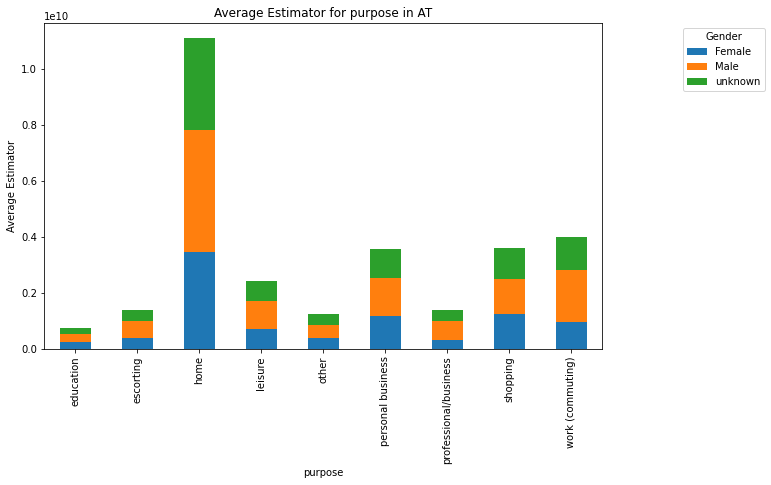

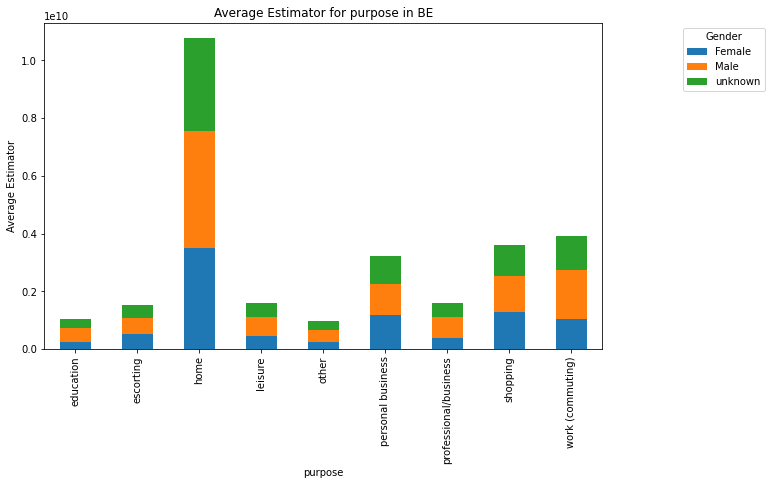

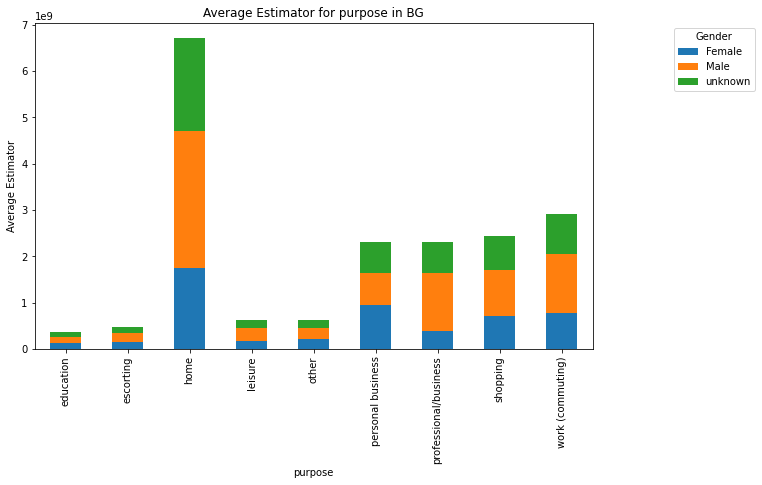

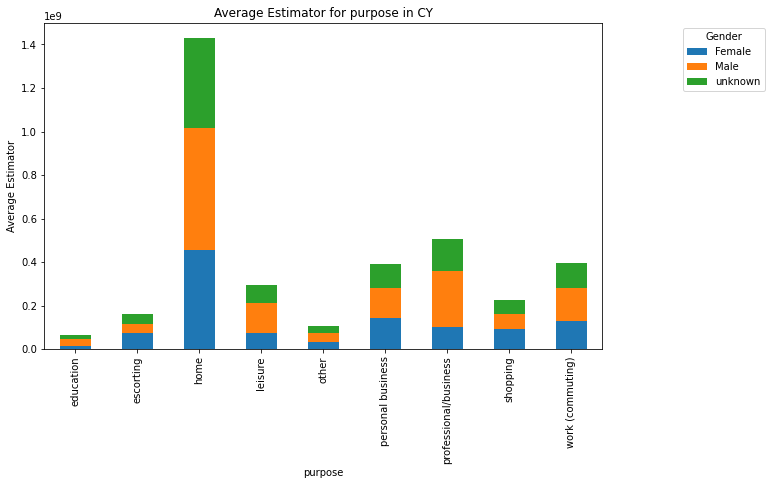

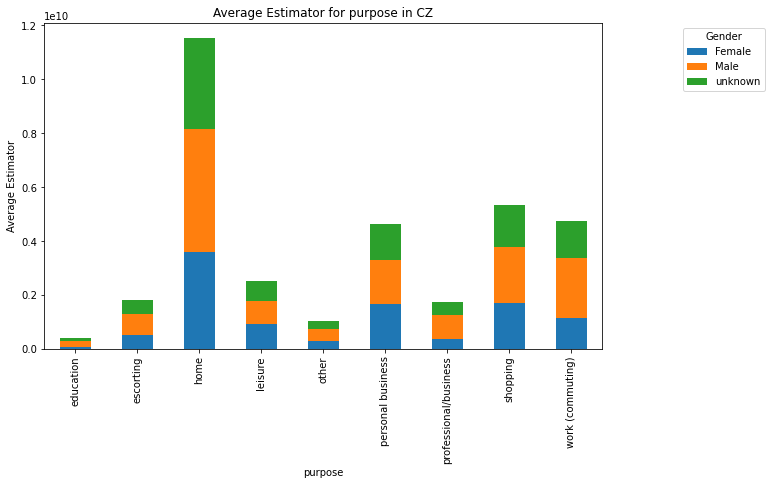

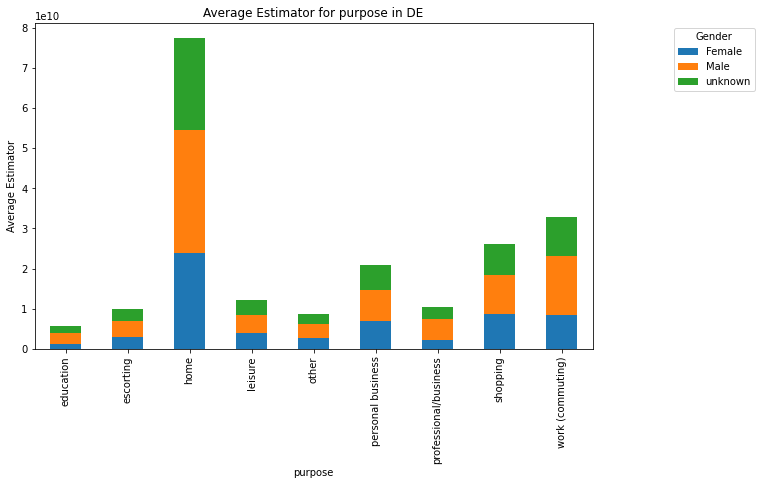

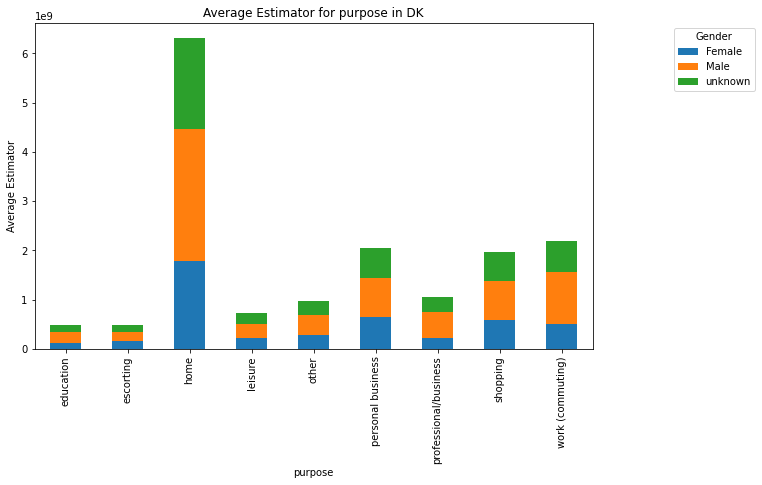

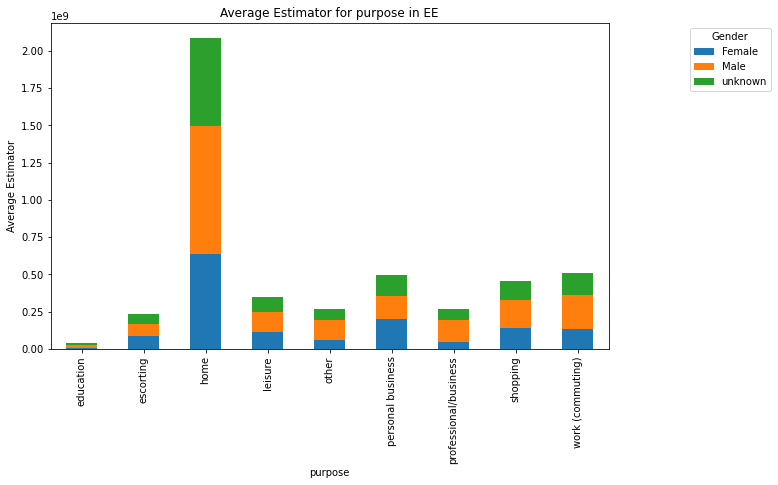

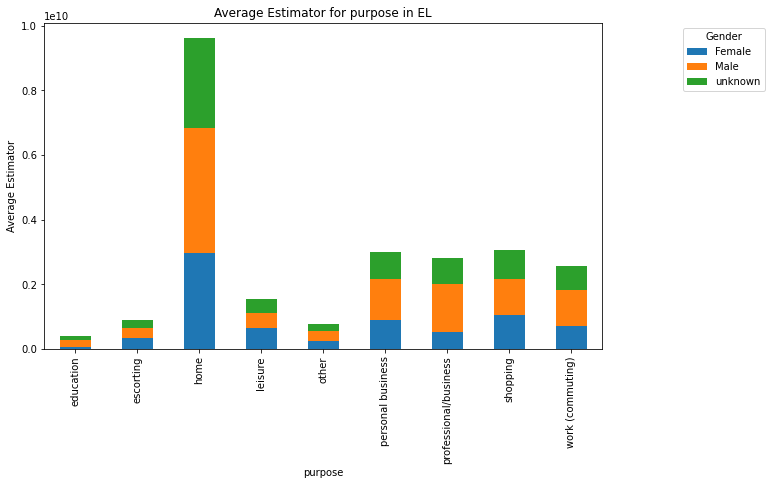

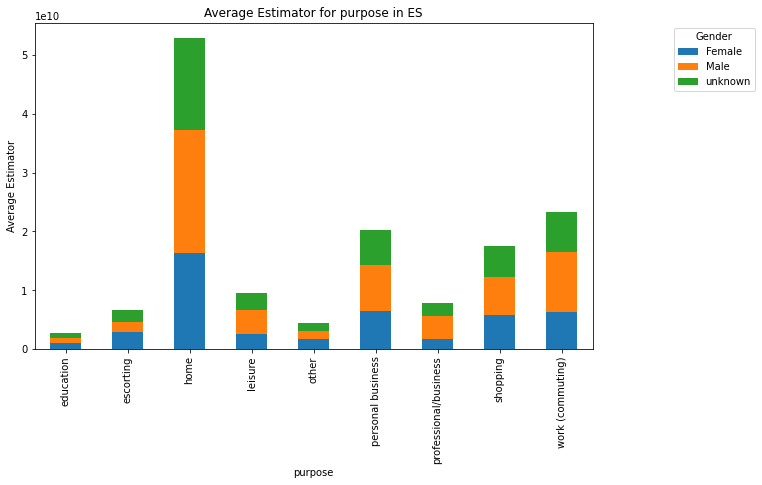

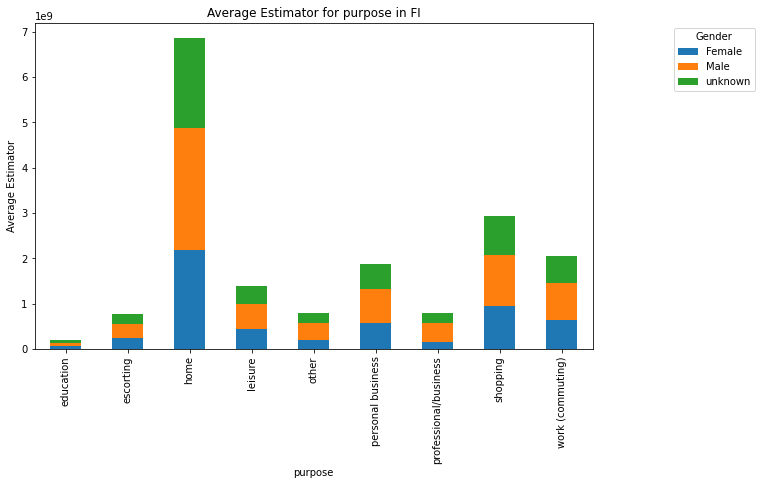

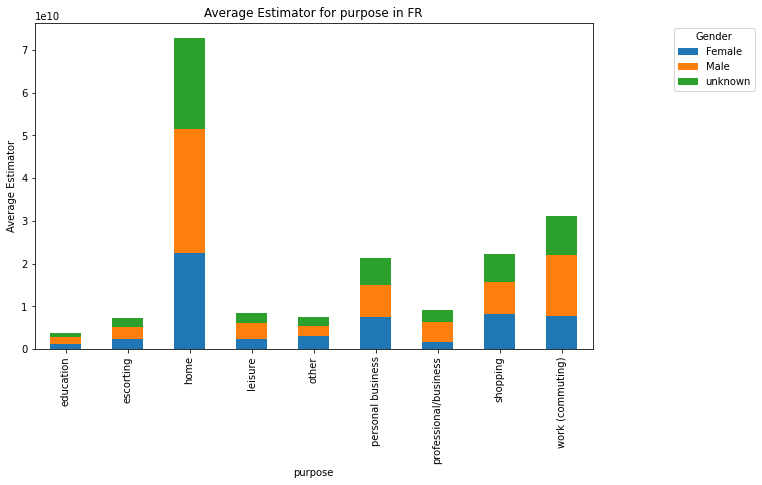

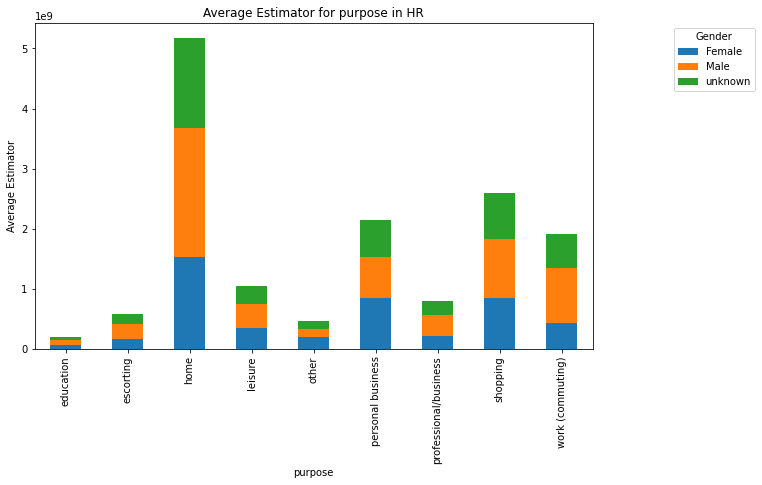

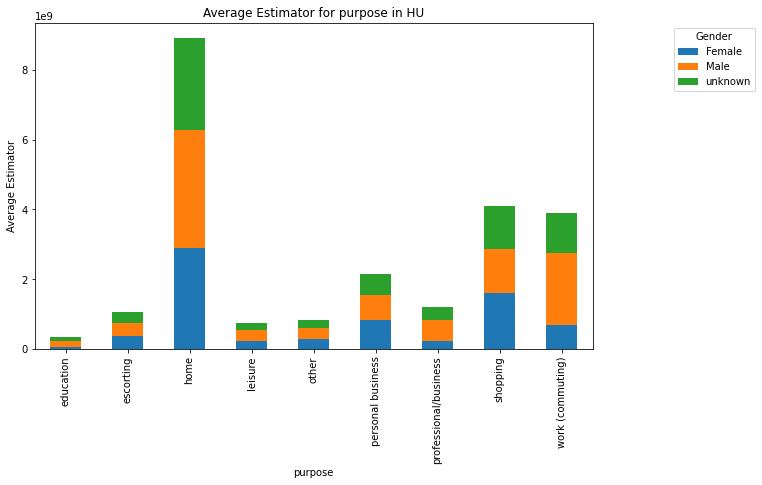

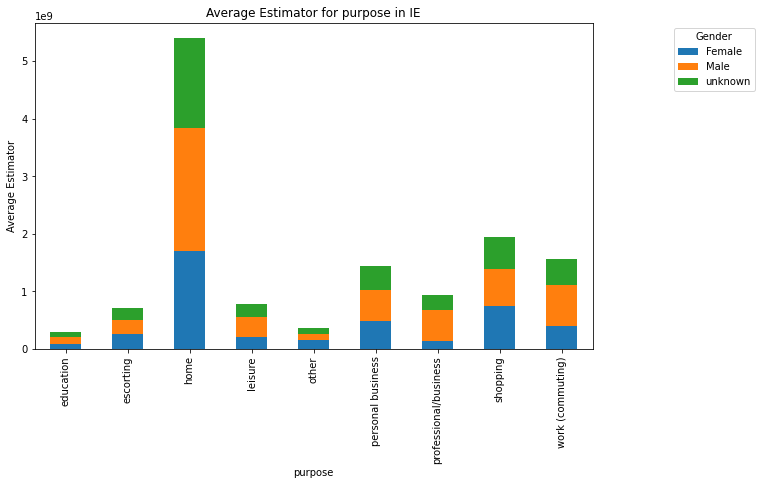

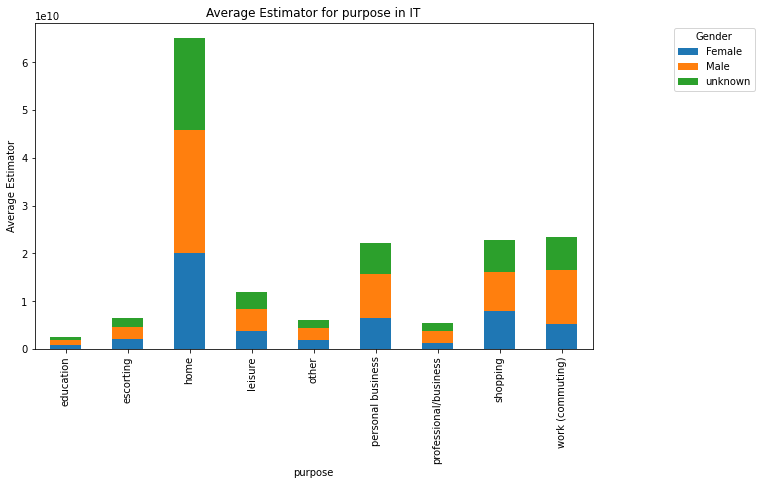

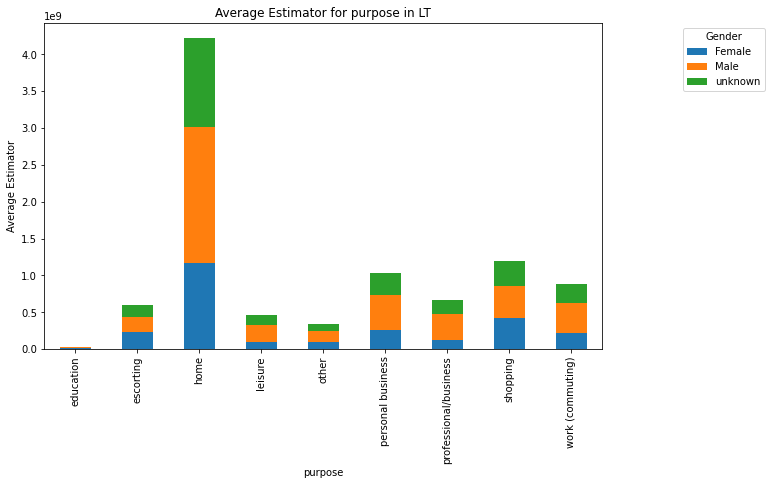

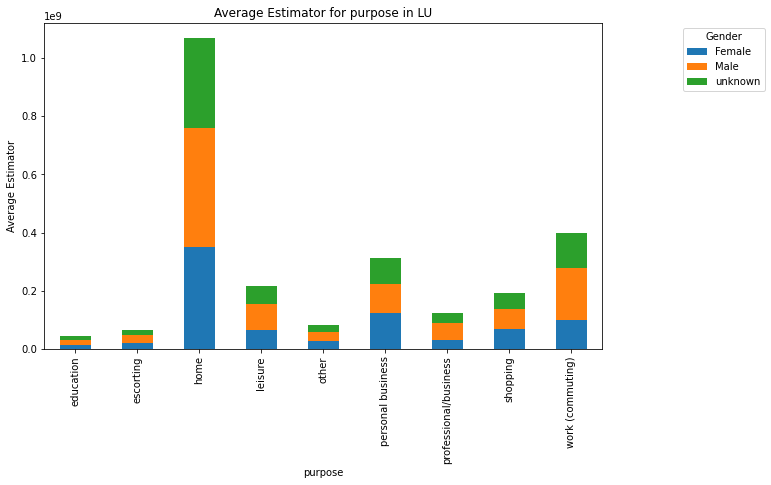

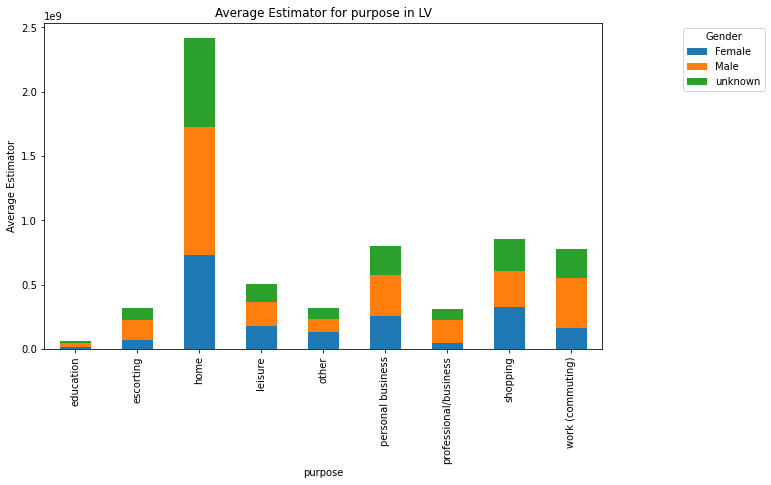

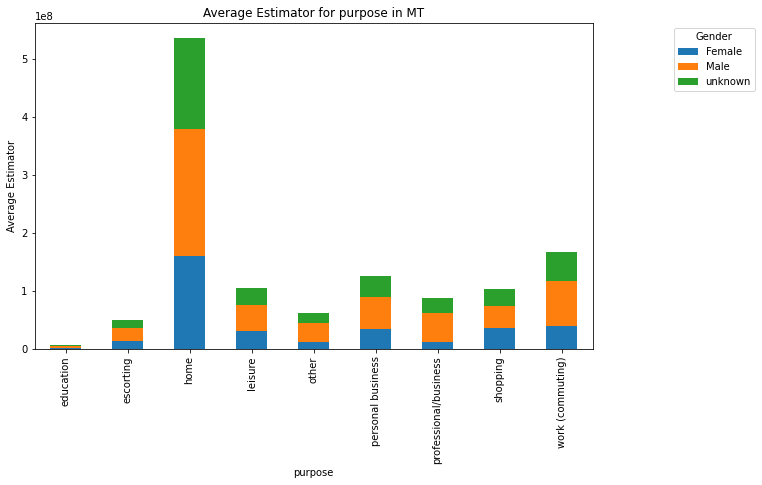

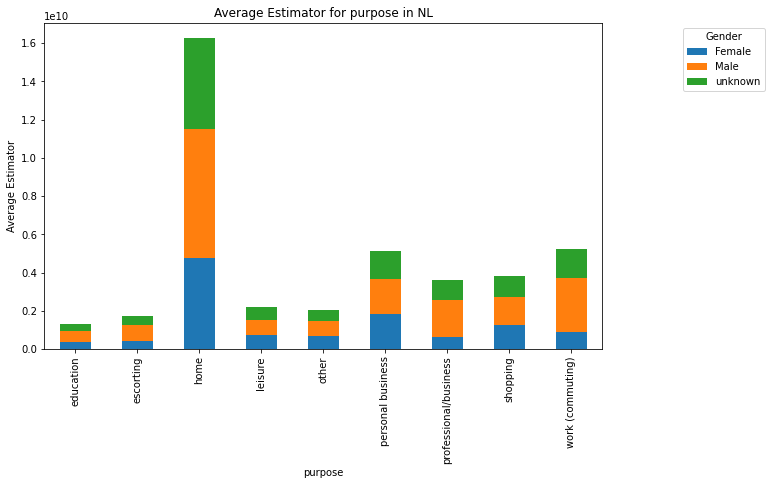

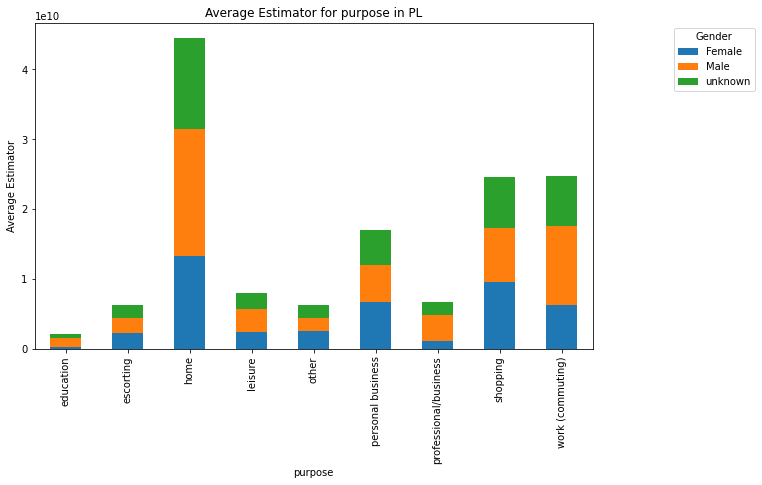

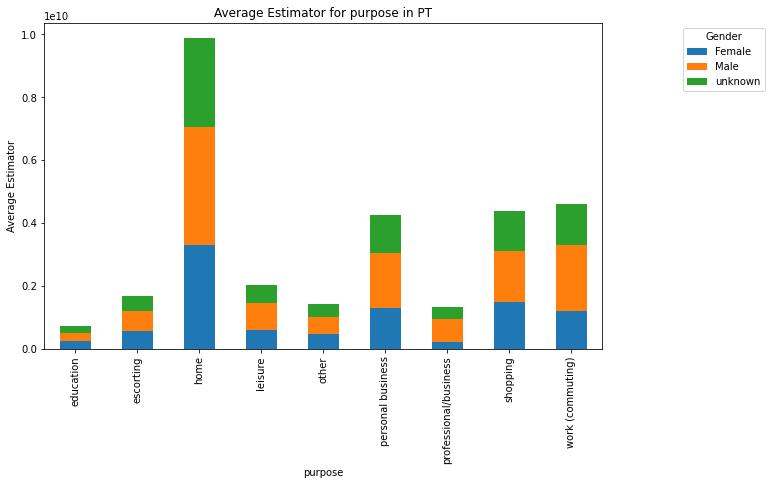

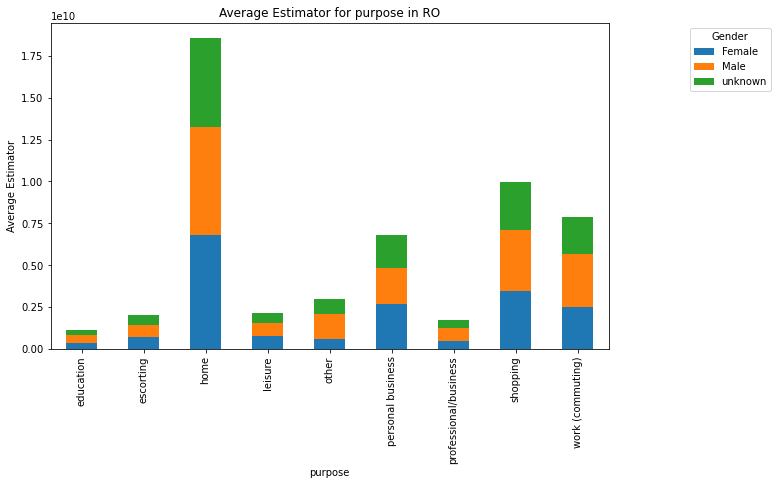

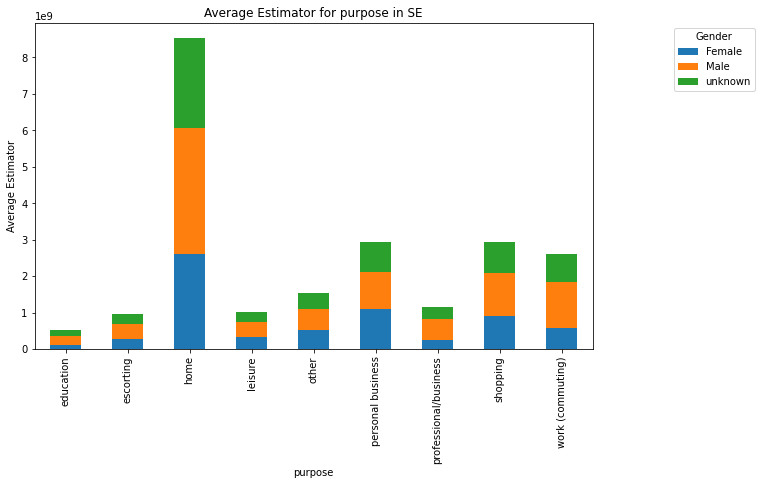

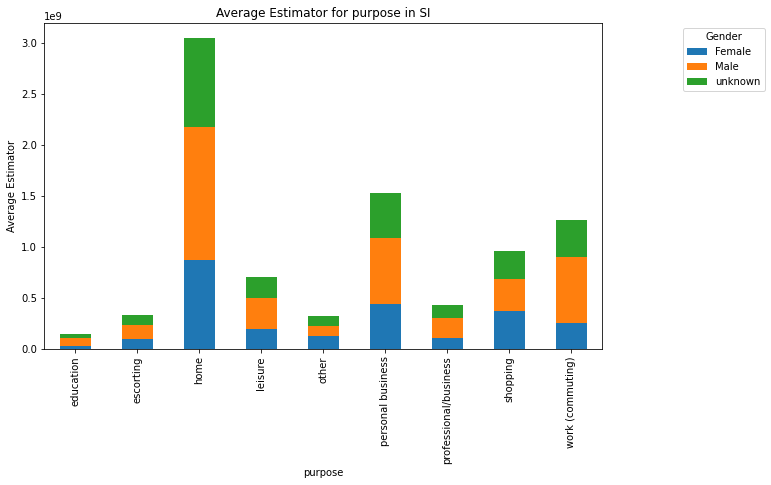

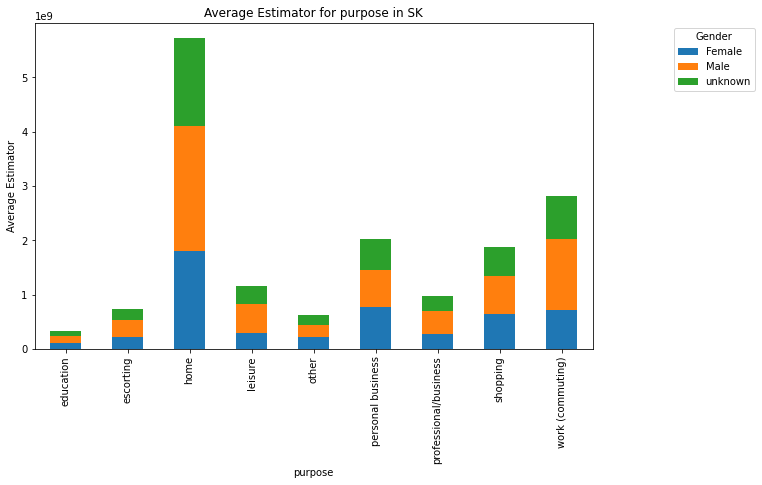

In [18]:
# Assuming 'data' is your DataFrame with columns 'Type', 'Sub type', 'Gender', and 'Estimator'
average_amounts = data.groupby(['Country', 'purpose', 'Gender'])['Estimator'].mean().unstack().reset_index()

# Iterate through unique 'Type' values
for type_value in average_amounts['Country'].unique():
    type_data = average_amounts[average_amounts['Country'] == type_value]

    # Plot stacked bar chart
    type_data.set_index('purpose').plot(kind='bar', stacked=True, figsize=(10, 6))

    plt.title(f'Average Estimator for purpose in {type_value}')
    plt.xlabel('purpose')
    plt.ylabel('Average Estimator')
    plt.legend(title='Gender', loc='upper right', bbox_to_anchor=(1.3, 1))
    plt.show()


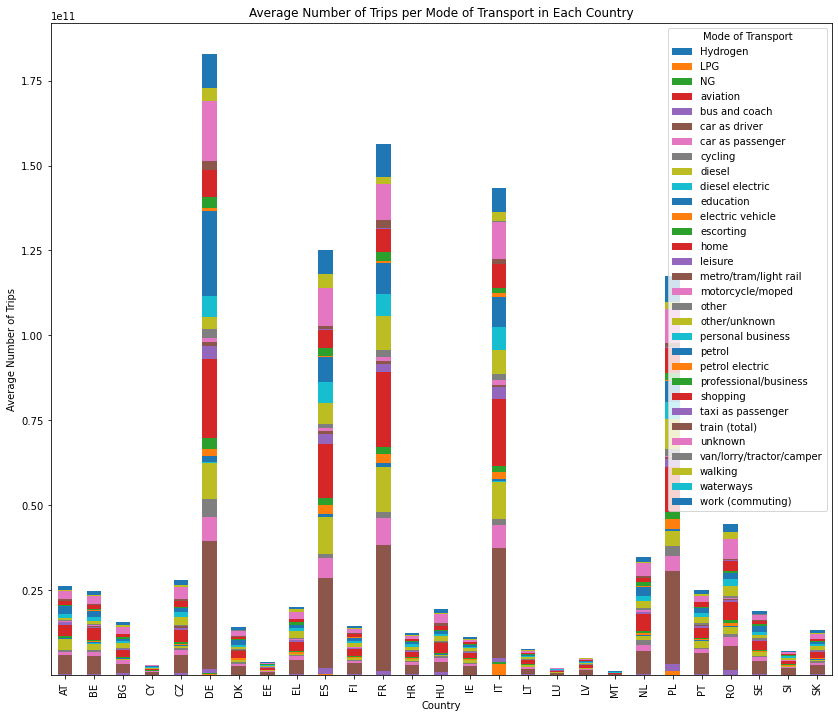

In [19]:
import matplotlib.pyplot as plt

# Calculate the average number of trips for each mode of transport in each country
average_trips = data.groupby(['Country', 'Sub type'])['Estimator'].mean().unstack()

# Plot a stacked bar chart
average_trips.plot(kind='bar', stacked=True, figsize=(14, 12))

plt.title('Average Number of Trips per Mode of Transport in Each Country')
plt.xlabel('Country')
plt.ylabel('Average Number of Trips')
plt.legend(title='Mode of Transport')
plt.show()


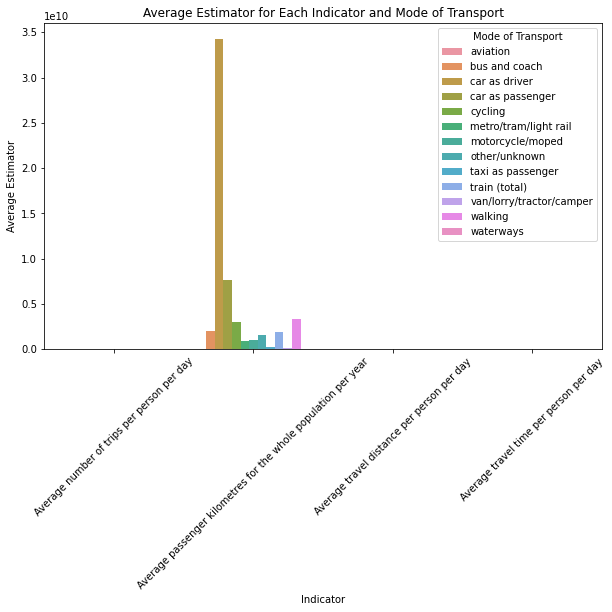

In [21]:
import seaborn as sns

# Group the data by 'Indicator' and 'mode' and calculate the mean of 'Estimator'
average_estimator = data.groupby(['Indicator', 'mode'])['Estimator'].mean().reset_index()

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Create a bar plot
sns.barplot(x='Indicator', y='Estimator', hue='mode', data=average_estimator)

plt.title('Average Estimator for Each Indicator and Mode of Transport')
plt.xlabel('Indicator')
plt.ylabel('Average Estimator')
plt.legend(title='Mode of Transport')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

plt.show()


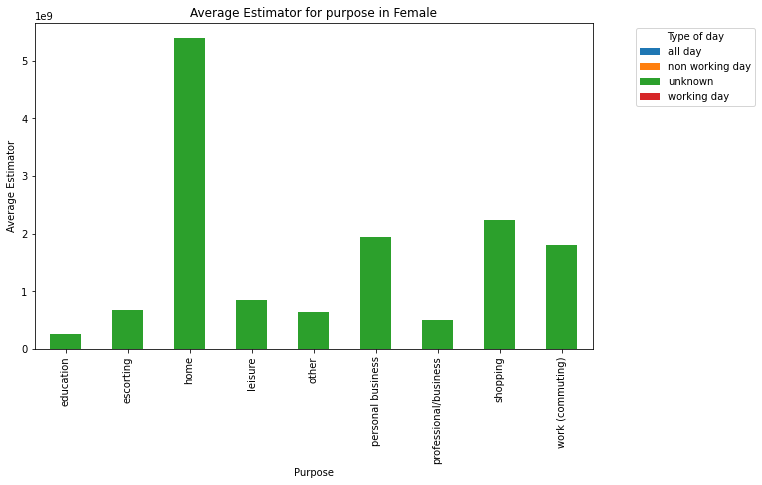

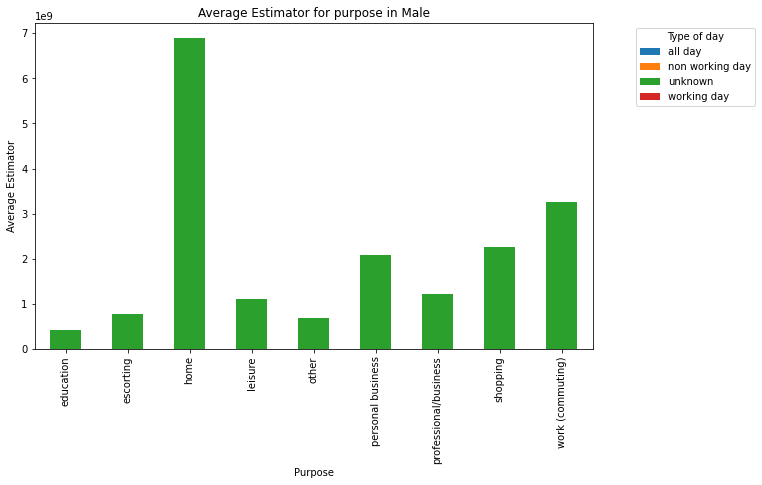

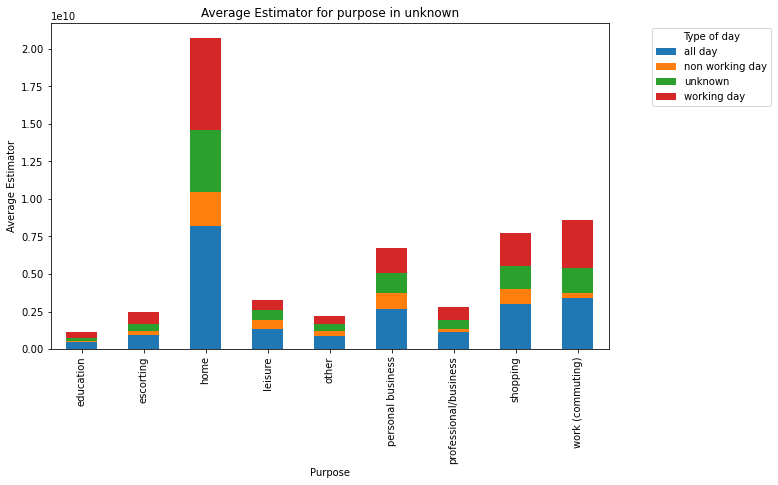

In [23]:
# Assuming 'data' is your DataFrame with columns 'Type', 'Sub type', 'Gender', and 'Estimator'
average_amounts = data.groupby(['purpose', 'Gender', 'Type of day'])['Estimator'].mean().unstack().reset_index()

# Iterate through unique 'Type' values
for type_value in average_amounts['Gender'].unique():
    type_data = average_amounts[average_amounts['Gender'] == type_value]

    # Plot stacked bar chart
    type_data.set_index('purpose').plot(kind='bar', stacked=True, figsize=(10, 6))

    plt.title(f'Average Estimator for purpose in {type_value}')
    plt.xlabel('Purpose')
    plt.ylabel('Average Estimator')
    plt.legend(title='Type of day', loc='upper right', bbox_to_anchor=(1.3, 1))
    plt.show()

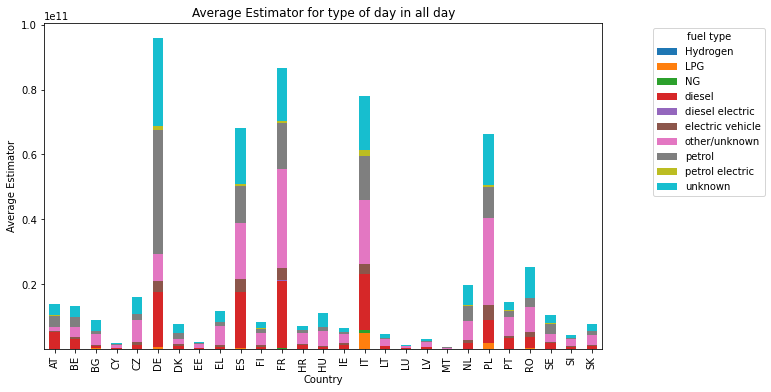

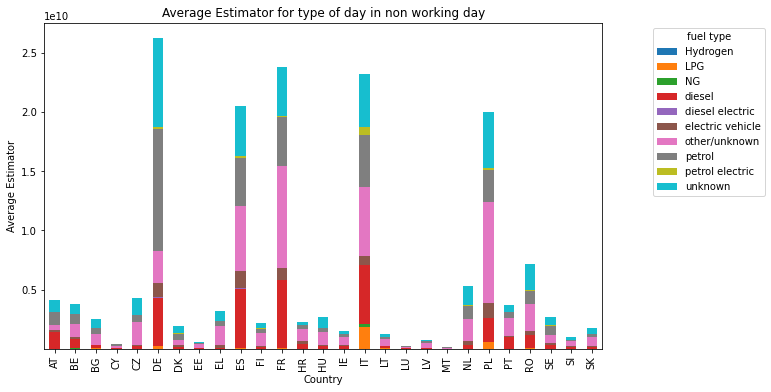

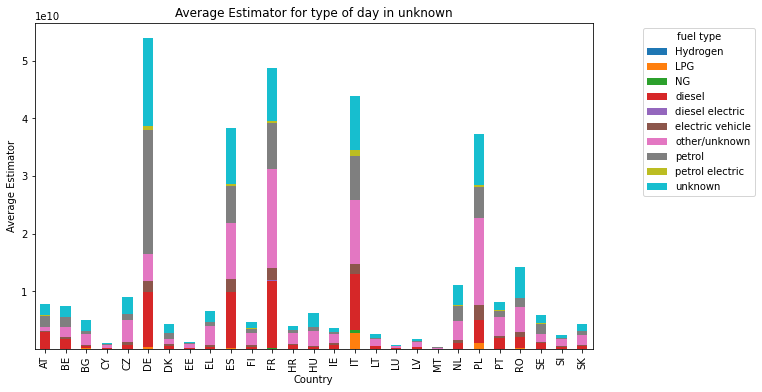

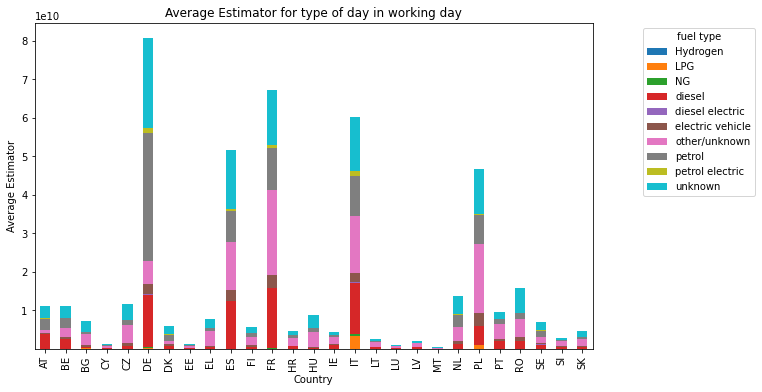

In [24]:
# Assuming 'data' is your DataFrame with columns 'Type', 'Sub type', 'Gender', and 'Estimator'
average_amounts = data.groupby(['Type of day', 'Country', 'fuel type'])['Estimator'].mean().unstack().reset_index()

# Iterate through unique 'Type' values
for type_value in average_amounts['Type of day'].unique():
    type_data = average_amounts[average_amounts['Type of day'] == type_value]

    # Plot stacked bar chart
    type_data.set_index('Country').plot(kind='bar', stacked=True, figsize=(10, 6))

    plt.title(f'Average Estimator for type of day in {type_value}')
    plt.xlabel('Country')
    plt.ylabel('Average Estimator')
    plt.legend(title='fuel type', loc='upper right', bbox_to_anchor=(1.3, 1))
    plt.show()

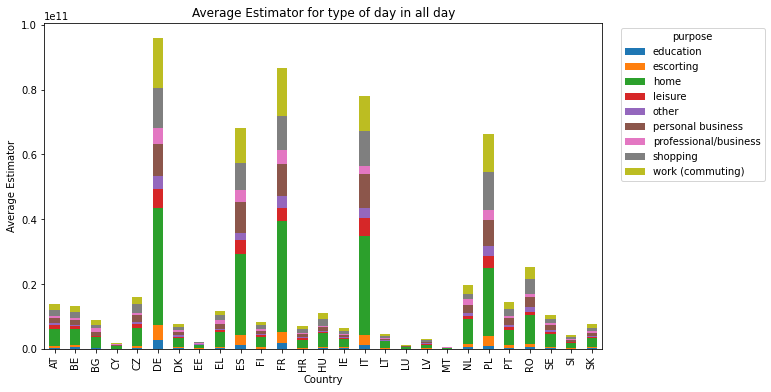

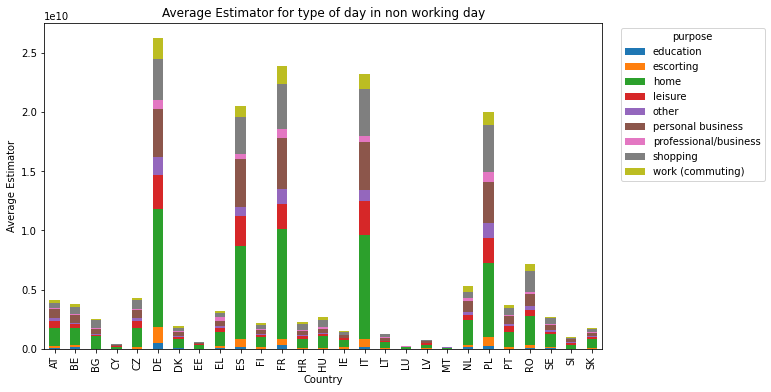

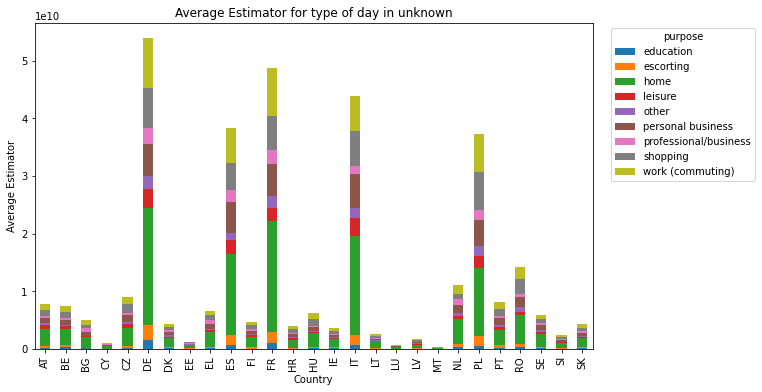

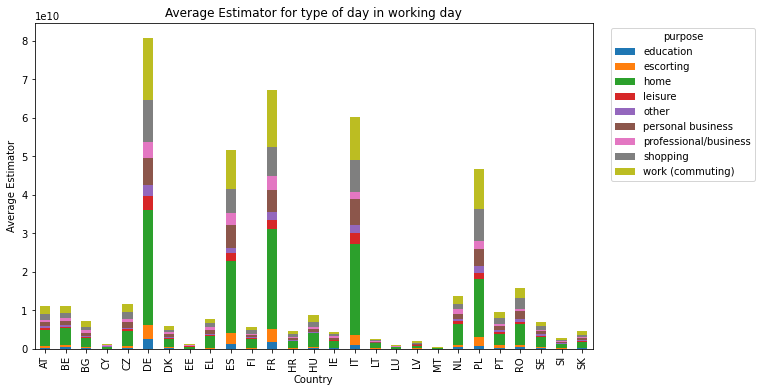

In [25]:
# Assuming 'data' is your DataFrame with columns 'Type', 'Sub type', 'Gender', and 'Estimator'
average_amounts = data.groupby(['Type of day', 'Country', 'purpose'])['Estimator'].mean().unstack().reset_index()

# Iterate through unique 'Type' values
for type_value in average_amounts['Type of day'].unique():
    type_data = average_amounts[average_amounts['Type of day'] == type_value]

    # Plot stacked bar chart
    type_data.set_index('Country').plot(kind='bar', stacked=True, figsize=(10, 6))

    plt.title(f'Average Estimator for type of day in {type_value}')
    plt.xlabel('Country')
    plt.ylabel('Average Estimator')
    plt.legend(title='purpose', loc='upper right', bbox_to_anchor=(1.3, 1))
    plt.show()

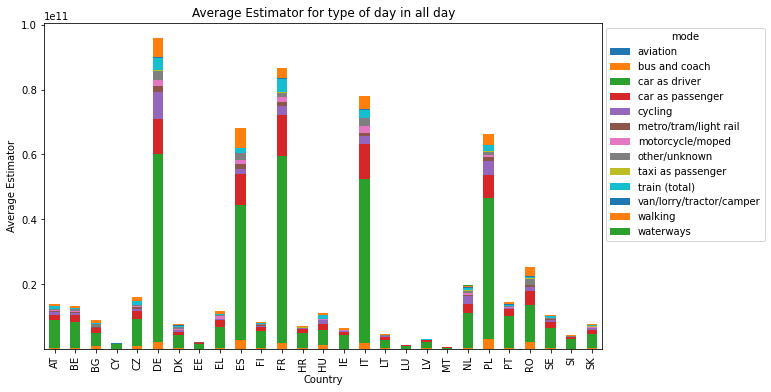

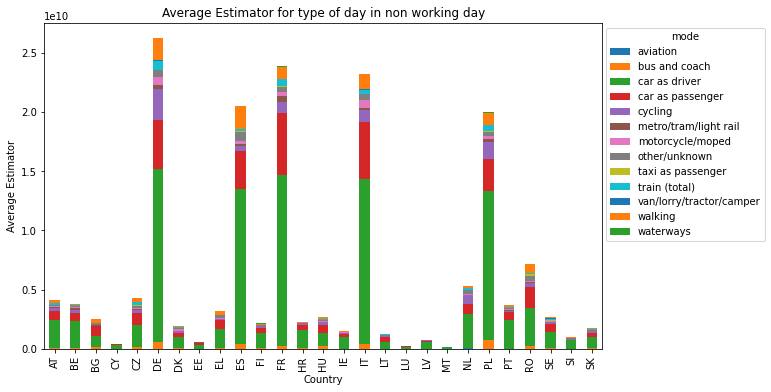

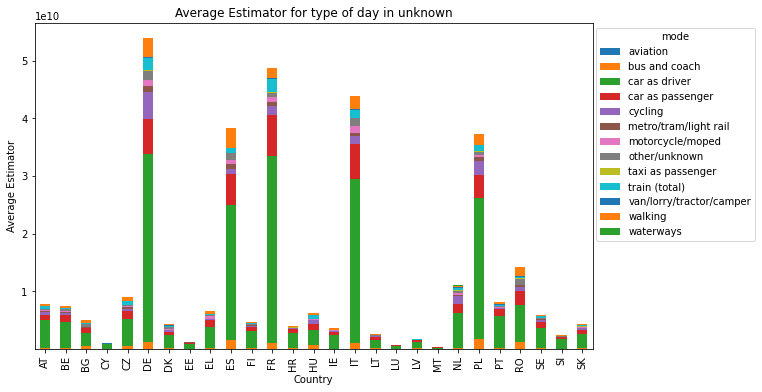

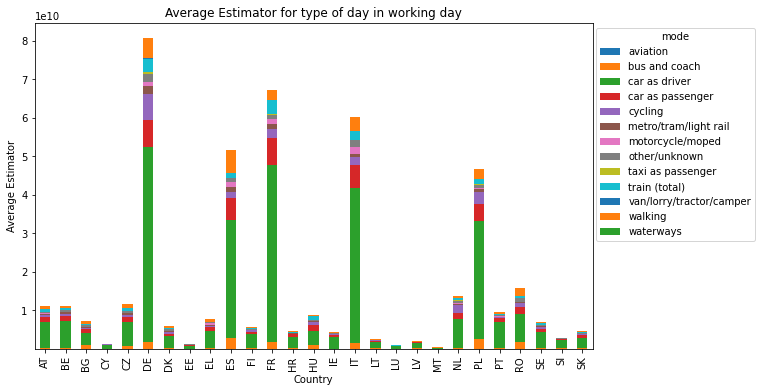

In [26]:
# Assuming 'data' is your DataFrame with columns 'Type', 'Sub type', 'Gender', and 'Estimator'
average_amounts = data.groupby(['Type of day', 'Country', 'mode'])['Estimator'].mean().unstack().reset_index()

# Iterate through unique 'Type' values
for type_value in average_amounts['Type of day'].unique():
    type_data = average_amounts[average_amounts['Type of day'] == type_value]

    # Plot stacked bar chart
    type_data.set_index('Country').plot(kind='bar', stacked=True, figsize=(10, 6))

    plt.title(f'Average Estimator for type of day in {type_value}')
    plt.xlabel('Country')
    plt.ylabel('Average Estimator')
    plt.legend(title='mode', loc='upper right', bbox_to_anchor=(1.3, 1))
    plt.show()

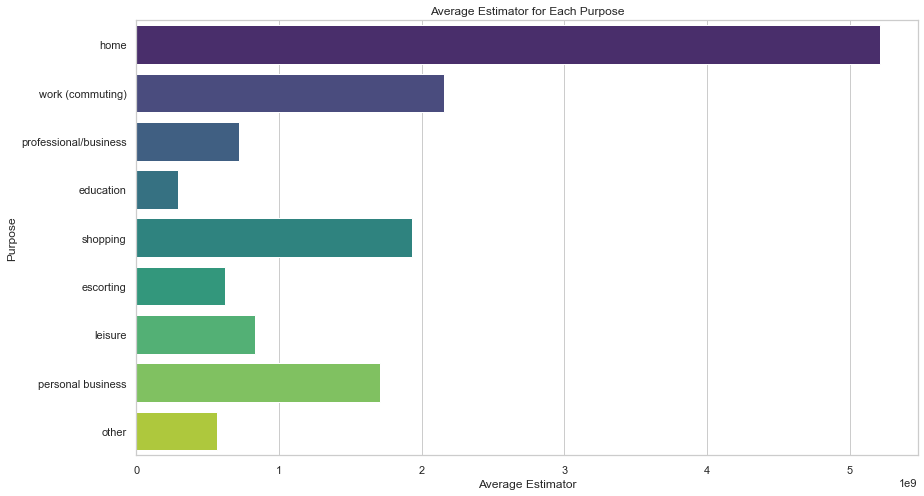

In [28]:
# Set the style for the plot
sns.set(style="whitegrid")

# Plotting all 'Sub type' categories and their average 'Estimator' values
plt.figure(figsize=(14, 8))
sns.barplot(x='Estimator', y='purpose', data=data, ci=None, palette='viridis')
plt.xlabel('Average Estimator')
plt.ylabel('Purpose')
plt.title('Average Estimator for Each Purpose')
plt.show()


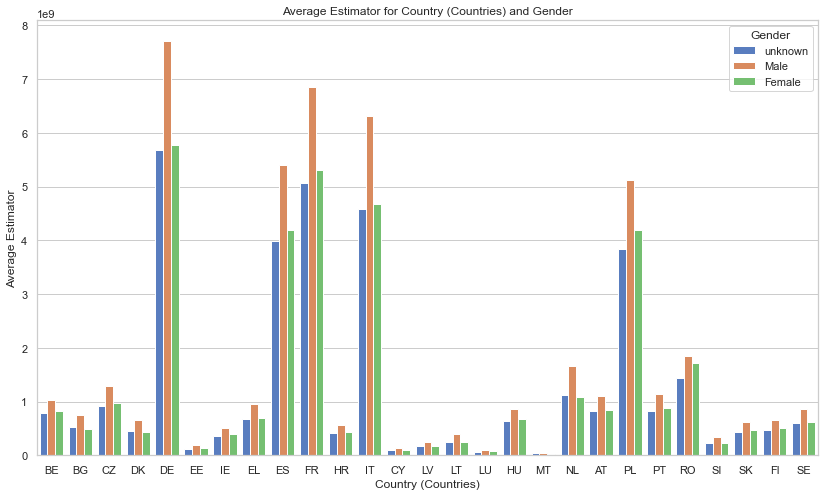

In [29]:
# Filter out rows where 'Estimator' is not applicable
filtered_data = data[data['Estimator'].notnull()]

# Create a grouped bar plot for 'Estimator' based on 'MS' and 'Gender'
plt.figure(figsize=(14, 8))
sns.barplot(x='Country', y='Estimator', hue='Gender', data=filtered_data, ci=None, palette='muted', dodge=True)
plt.xlabel('Country (Countries)')
plt.ylabel('Average Estimator')
plt.title('Average Estimator for Country (Countries) and Gender')
plt.legend(title='Gender')
plt.show()


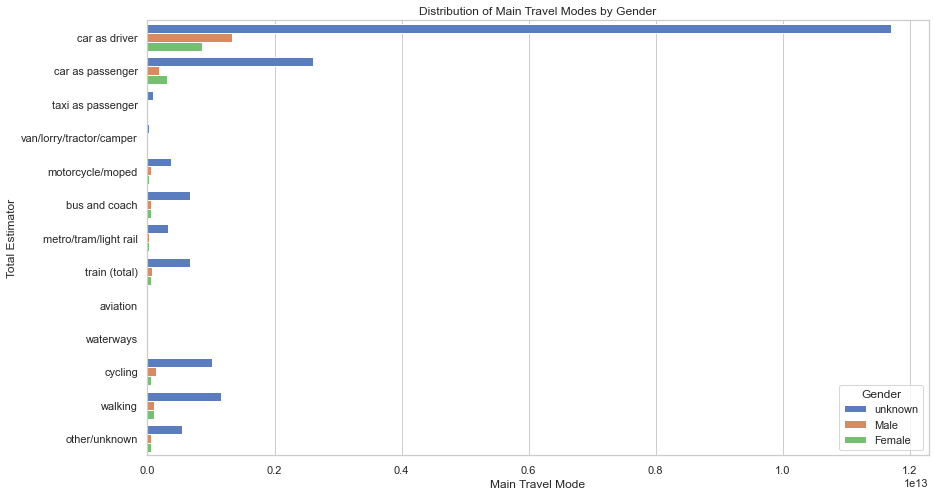

In [30]:
# Filter out rows where 'Estimator' is not applicable
filtered_data = data[data['Estimator'].notnull()]

# Create a stacked bar plot for the distribution of main travel modes with 'Gender' as hue
plt.figure(figsize=(14, 8))
sns.barplot(x='Estimator', y='mode', hue='Gender', data=filtered_data, ci=None, palette='muted', estimator=sum)
plt.xlabel('Main Travel Mode')
plt.ylabel('Total Estimator')
plt.title('Distribution of Main Travel Modes by Gender')
plt.legend(title='Gender')
plt.show()


In [31]:
# Display the statistical summary of numeric columns in the dataset
numeric_summary = data.describe(include='number')
numeric_summary


,Estimator,Sample size
count,5.184000e+04,51840.000000
mean,1.316200e+09,2202.686420
std,8.628292e+09,1929.366806
min,0.000000e+00,131.000000
25%,4.079587e-02,881.000000
50%,8.802479e-01,1613.000000
75%,1.636003e+01,3067.000000
max,3.479998e+11,9884.000000


In [32]:
# Count occurrences of each unique value in the 'Gender' column
gender_counts = data['Gender'].value_counts()

# Display the result
gender_counts


unknown    44928
Male        3456
Female      3456
Name: Gender, dtype: int64

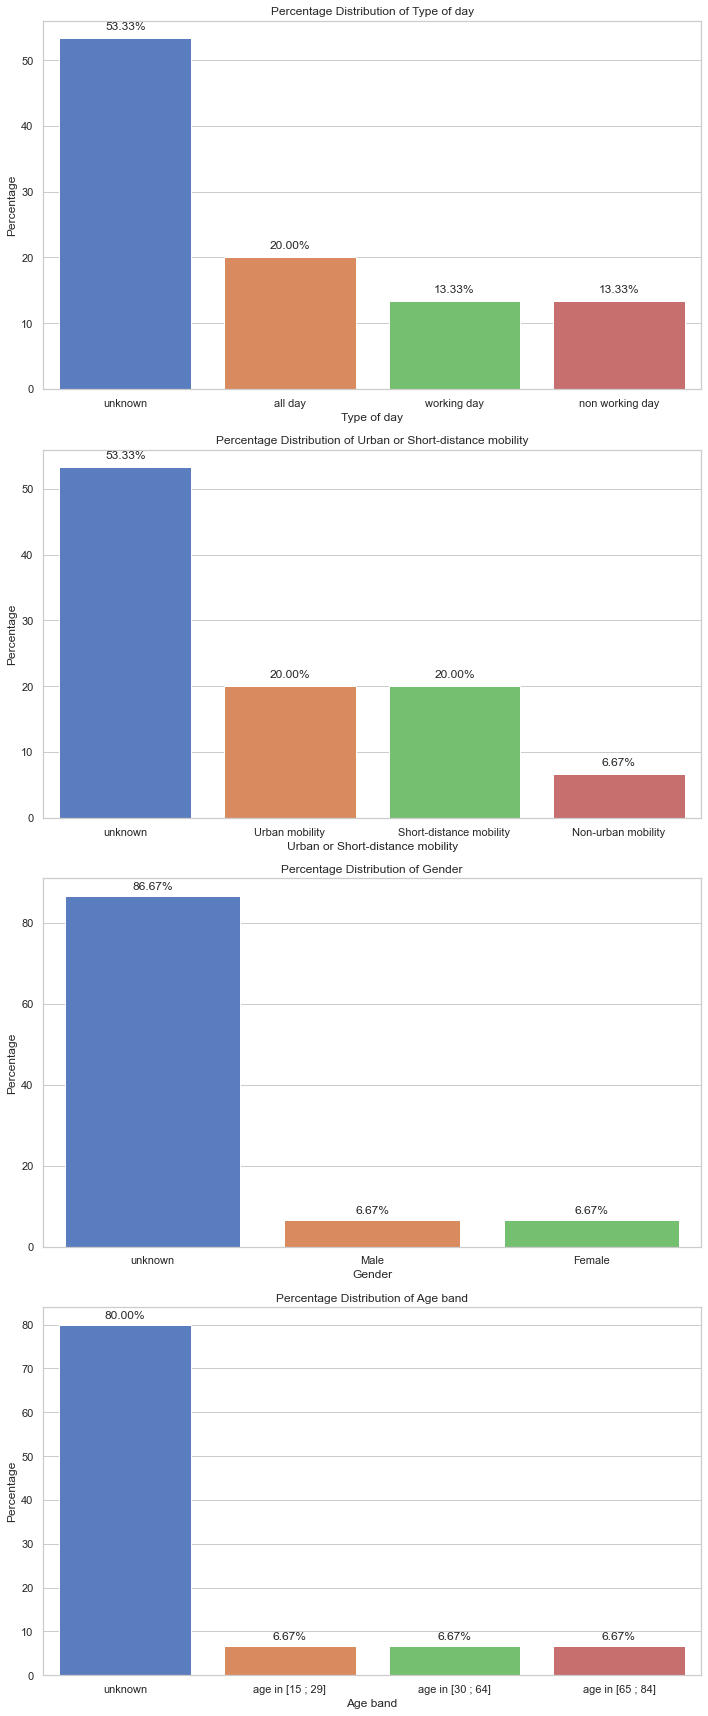

In [33]:
# Specify the columns for analysis
columns_to_analyze = ['Type of day', 'Urban or Short-distance mobility', 'Gender','Age band']

# Create subplots based on the number of specified columns
fig, axes = plt.subplots(nrows=len(columns_to_analyze), ncols=1, figsize=(10, 6 * len(columns_to_analyze)))

# Iterate through each specified column and create a bar plot
for i, column in enumerate(columns_to_analyze):
    # Count occurrences of each unique value
    column_counts = data[column].value_counts()

    # Calculate percentages
    column_percentages = (column_counts / column_counts.sum()) * 100

    # Create a bar plot
    sns.barplot(x=column_percentages.index, y=column_percentages.values, palette='muted', ax=axes[i])

    # Display percentage values on top of each bar
    for bar, percentage in zip(axes[i].patches, column_percentages.values):
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width() / 2, height + 1, f'{percentage:.2f}%', ha='center', va='bottom')

    # Set labels and title for each subplot
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Percentage')
    axes[i].set_title(f'Percentage Distribution of {column}')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


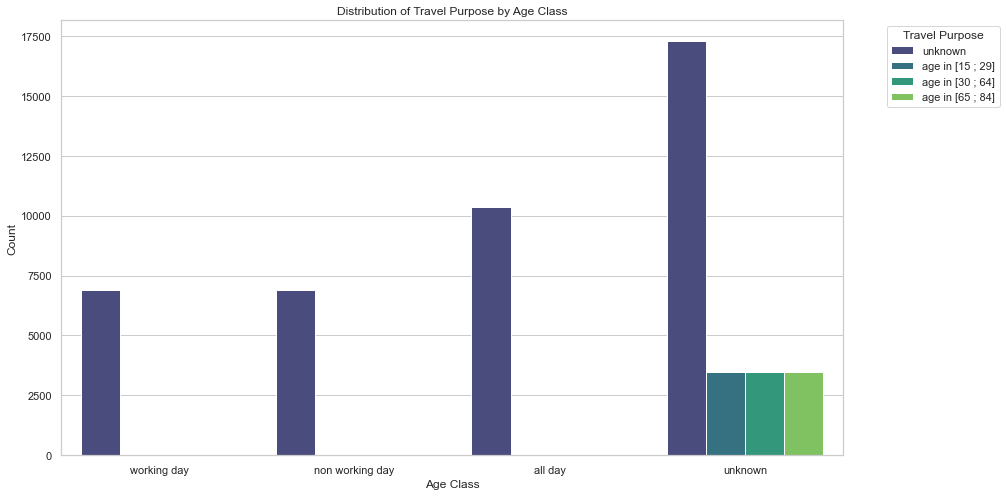

In [34]:
# Create a count plot for the distribution of travel purpose by age class
plt.figure(figsize=(14, 8))
sns.countplot(x='Type of day', hue='Age band', data=data, palette='viridis')
plt.xlabel('Age Class')
plt.ylabel('Count')
plt.title('Distribution of Travel Purpose by Age Class')
plt.legend(title='Travel Purpose', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
